In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

df = pd.read_csv("C:/Users/owcha/Desktop/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Preprocessing for missing values and bad dtype.

df = df.dropna(axis=0)

#Bad type and useless labels.

le = LabelEncoder()
le_count = 0

useless_cat = [ col for col in df if len(list(df[col].unique())) == 1 ]
for cat in useless_cat:
    df = df.drop(cat, axis=1)

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) >= 1:
            df[col] = le.fit_transform(df[col])
            le_count += 1
            
print('%d columns were label encoded.' % le_count)
print('%d columns were removed.' % len(useless_cat))

print('Datashape: ', df.shape)
print( df.dtypes.value_counts() )

15 columns were label encoded.
4 columns were removed.
Datashape:  (8602, 118)
float64    65
int64      38
int32      15
dtype: int64


0.9320162696106915
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1604
           1       1.00      0.00      0.00       117

    accuracy                           0.93      1721
   macro avg       0.97      0.50      0.48      1721
weighted avg       0.94      0.93      0.90      1721



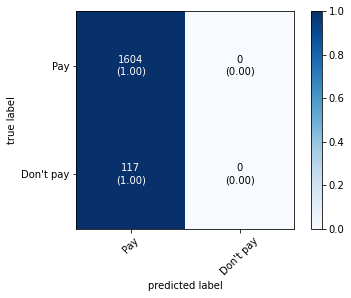

In [10]:
#The following code divides data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier(n_estimators=40, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Result.
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=["Pay", "Don't pay"])

print ( conf_mat.diagonal().sum()/conf_mat.sum() )

print( classification_report(y_test, y_pred, zero_division=1))
#The recall means "how many of this class you find over the whole number of element of this class".
#The precision will be "how many are correctly classified among that class".
#The f1-score is the harmonic mean between precision & recall.
#The support is the number of occurence of the given class in your dataset.

#print( accuracy_score(y_test, oversampled_pred) )